In [1]:
# Importing Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import os
from google.colab import drive
from glob import glob
import time
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Flatten, Dense
from sklearn.metrics import roc_curve, auc, accuracy_score

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Define dataset path
dataset_path = '/content/drive/MyDrive/Dataset'

Mounted at /content/drive


In [3]:
# Use ImageDataGenerator for data loading and augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

In [4]:
# Split the data into training and validation sets
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=42
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=42
)

Found 18900 images belonging to 10 classes.
Found 8100 images belonging to 10 classes.


In [5]:
# Build a deeper CNN model with dropout for regularization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(256, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model using the generators
# Define a callback to print a message and keep the session active
class KeepSessionActiveAndSaveModel(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("Colab is active! Epoch:", epoch + 1)
        # Save the model after each epoch
        self.model.save("/content/drive/MyDrive/Own2_10epoch.h5".format(epoch + 1))
# Train the model
model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[KeepSessionActiveAndSaveModel()]
)

Epoch 1/10
591/591 [==============================] - 6001s 10s/step - loss: 1.4139 - accuracy: 0.4381 - val_loss: 1.0010 - val_accuracy: 0.6235


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10
591/591 [==============================] - 203s 343ms/step - loss: 0.9331 - accuracy: 0.6637 - val_loss: 0.8407 - val_accuracy: 0.7007
Epoch 3/10
591/591 [==============================] - 218s 368ms/step - loss: 0.7507 - accuracy: 0.7337 - val_loss: 0.6609 - val_accuracy: 0.7552
Epoch 4/10
591/591 [==============================] - 220s 372ms/step - loss: 0.6680 - accuracy: 0.7643 - val_loss: 0.6721 - val_accuracy: 0.7631
Epoch 5/10
591/591 [==============================] - 227s 384ms/step - loss: 0.5816 - accuracy: 0.7967 - val_loss: 0.4912 - val_accuracy: 0.8240
Epoch 6/10
591/591 [==============================] - 224s 379ms/step - loss: 0.5118 - accuracy: 0.8210 - val_loss: 0.6412 - val_accuracy: 0.7712
Epoch 7/10
591/591 [==============================] - 216s 365ms/step - loss: 0.4490 - accuracy: 0.8436 - val_loss: 0.4344 - val_accuracy: 0.8478
Epoch 8/10
591/591 [==============================] - 214s 362ms/step - loss: 0.4143 - accuracy: 0.8549 - val_loss: 0.4218 -

In [7]:
# Evaluate the model on the test dataset
# Load the pre-trained model from the .h5 file
model = load_model('/content/drive/MyDrive/Own2_10epoch.h5')

# Define the test dataset directory
test_data_dir = '/content/drive/MyDrive/Testing Dataset'

# Set the input size of the model
input_size = (64, 64)

# Set batch size for data generator
batch_size = 32

# Create an ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a generator for the test dataset
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Set to False to maintain order for evaluation
)

Found 1000 images belonging to 10 classes.


32/32 [==============================] - 210s 7s/step


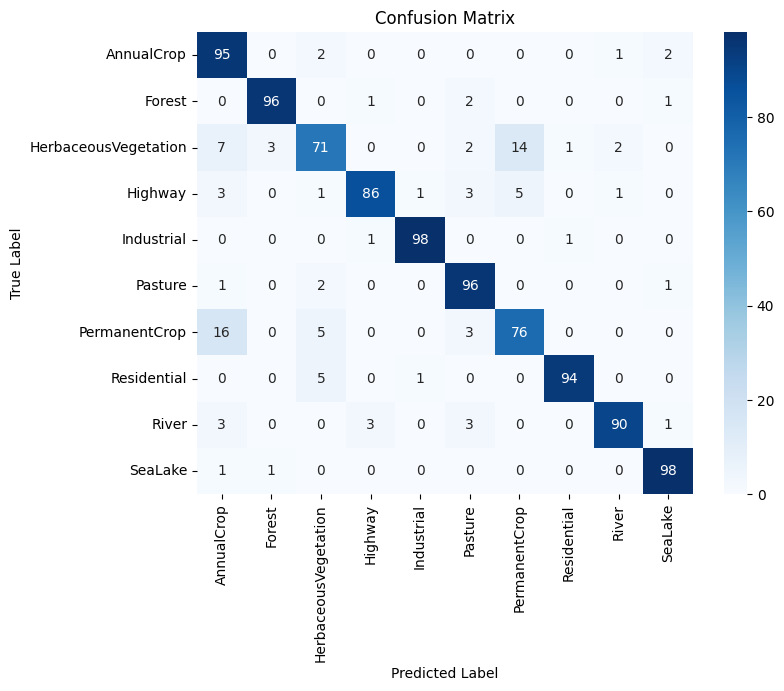

In [8]:
# Generate predictions and evaluate the model
# Generate predictions for the test dataset
predictions = model.predict(test_generator)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels
true_labels = test_generator.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display confusion matrix with numerical values
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [12]:
# Generate and print classification report
class_report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices)
print("Classification Report:")
print(class_report)
accuracy = accuracy_score(true_labels, predicted_labels) * 100
print("The accuracy of Custom CNN Model is: ", accuracy)

Classification Report:
                      precision    recall  f1-score   support

          AnnualCrop       0.75      0.95      0.84       100
              Forest       0.96      0.96      0.96       100
HerbaceousVegetation       0.83      0.71      0.76       100
             Highway       0.95      0.86      0.90       100
          Industrial       0.98      0.98      0.98       100
             Pasture       0.88      0.96      0.92       100
       PermanentCrop       0.80      0.76      0.78       100
         Residential       0.98      0.94      0.96       100
               River       0.96      0.90      0.93       100
             SeaLake       0.95      0.98      0.97       100

            accuracy                           0.90      1000
           macro avg       0.90      0.90      0.90      1000
        weighted avg       0.90      0.90      0.90      1000

The accuracy of Custom CNN Model is:  90.0


<ipython-input-10-9a17a36cc49f>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random')


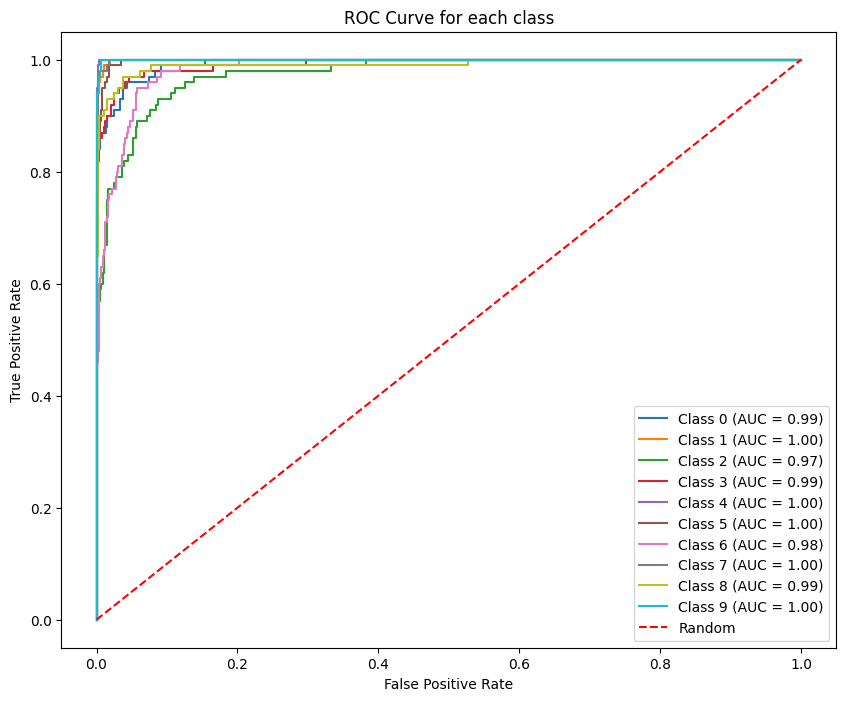

In [10]:
# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(test_generator.num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels, predictions[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(test_generator.num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc='best')
plt.show()

In [11]:
# Calculate Additional Metrics
# Define the number of classes
num_classes = len(test_generator.class_indices)

# Set a common threshold for binary classification
threshold = 0.5

# Convert predicted probabilities to binary predictions
predicted_labels_binary = (predictions > threshold).astype(int)

# Extract True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN)
tp = int((accuracy / 100) * len(true_labels))
fp = len(true_labels) - tp
tn = int((accuracy / 100) * len(true_labels))
fn = len(true_labels) - tn

# Calculate True Positive Rate (TPR), False Positive Rate (FPR), Precision, Recall, F1 Score
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
precision = tp / (tp + fp)
recall = tpr
f1 = 2 * (precision * recall) / (precision + recall)

# Calculate Area Under ROC Curve (AUC)
roc_auc = dict()
for i in range(num_classes):
    fpr_i, tpr_i, _ = roc_curve(true_labels, predictions[:, i], pos_label=i)
    roc_auc[i] = auc(fpr_i, tpr_i)

# Display the computed metrics for the dataset
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Area Under ROC Curve (AUC): {np.mean(list(roc_auc.values())):.4f}")

True Positive Rate (TPR): 0.9000
False Positive Rate (FPR): 0.1000
Precision: 0.9000
Recall: 0.9000
F1 Score: 0.9000
Area Under ROC Curve (AUC): 0.9930
